## EMOTION DETECTION


### IMPORTS and DATA PREPROCESSING

In [ ]:
! pip install transformers

In [ ]:
!pip install xformers

In [3]:
#imports
import pandas as pd
import re
from textblob import Word
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline
from matplotlib.ticker import FuncFormatter
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding, Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
#define column names
colnames=['Part','Chapter','Character', 'Sentence']

# Read the CSV files
Script1 = pd.read_csv('/content/hp1.csv',sep=',',names= colnames)
Script2 = pd.read_csv('/content/hp2.csv',sep=',',names= colnames)
Script3 = pd.read_csv('/content/hp3.csv', sep=',',names=colnames)
Script4 = pd.read_csv('/content/hp4.csv', sep=',',names=colnames)
Script5 = pd.read_csv('/content/hp5.csv', sep=',',names=colnames)
Script6 = pd.read_csv('/content/hp6.csv', sep=',',names=colnames)
Script7 = pd.read_csv('/content/hp7.csv', sep=',',names=colnames)
Script8 = pd.read_csv('/content/hp8.csv', sep=',',names=colnames)
#concat the three scripts into one
df = pd.concat([Script1, Script2, Script3,Script4,Script5,Script6,Script7,Script8])
df = df.drop(Script1.index[0])
#set order of levels in Part column
df['Part'] = pd.Categorical(df['Part'], ["Harry Potter and the Philosopher's Stone",'Harry Potter and the Chamber of Secrets',"Harry Potter and the Prisoner of Azkaban","Harry Potter and the Gobelt of Fire", "Harry Potter and the Order of the Phoenix","Harry Potter and the Half-Blood Prince","Harry Potter and the Deathly Hallows Part 1","Harry Potter and the Deathly Hallows Part 2"])
#cast chracater column to string
df['Character'] = df['Character'].astype(str).dropna()
#aplly strip and capitalize each character
df['Character'] = df['Character'].apply(lambda x: x.strip().capitalize())

In [6]:
len(df['Character'].unique())

173

In [42]:
def clean_text(text):
  text = str(text)
  text = re.sub('[/0]','',text)
  #remove numbers
  text = re.sub(r'\d+', '', text)
  #remove whitespaces
  text = text.strip()
  return text

In [43]:
df['Sentence'] = df['Sentence'].apply(clean_text)

In [44]:
chapters_df = pd.read_csv('/content/Chapters.csv',encoding='cp1252')
chapters_df['Chapter']= chapters_df['Chapter Name']
chapters_df['movie_chapter']=chapters_df['Movie ID'].astype(str) +'.'+ chapters_df['Chapter ID'].astype(str)
df_cha = chapters_df[['Chapter','movie_chapter']]
df = pd.merge(df, df_cha, on = ['Chapter'])

In [45]:
df.head()

,Part,Chapter,Character,Sentence,movie_chapter
0,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus dumbledore,I should have known that you would be here...P...,1.1
1,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva mcgonagall,"Good evening, Professor Dumbledore. Are the ru...",1.1
2,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus dumbledore,"I'm afraid so, Professor. The good, and the bad.",1.1
3,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva mcgonagall,And the boy?,1.1
4,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus dumbledore,Hagrid is bringing him.,1.1


### DATA VISUALIZATIONS

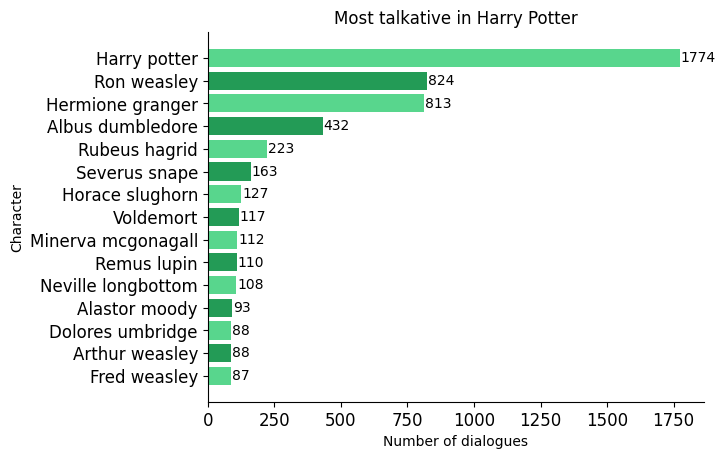

In [10]:
# prepare the table
df_counts = df['Character'].value_counts().reset_index().rename(columns={'index': 'Character', 'Character': 'n'})
df_top15 = df_counts.head(15)

# the plot
fig, ax = plt.subplots()
bar_plot = ax.barh(df_top15['Character'], df_top15['n'], color=['#58D68D', '#239B56'])
ax.set_xlabel('Number of dialogues')
ax.set_ylabel('Character')
ax.set_title('Most talkative in Harry Potter')

# add labels
for i, v in enumerate(df_top15['n']):
    ax.text(v + 3, i, str(v), ha='left', va='center')

# invert y-axis
ax.invert_yaxis()

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(fontsize=12,)
plt.xticks(fontsize=12,)

plt.show()

<ipython-input-11-e26c281ec677>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top15['Percentage'] = df_top15['n'] / len(df)


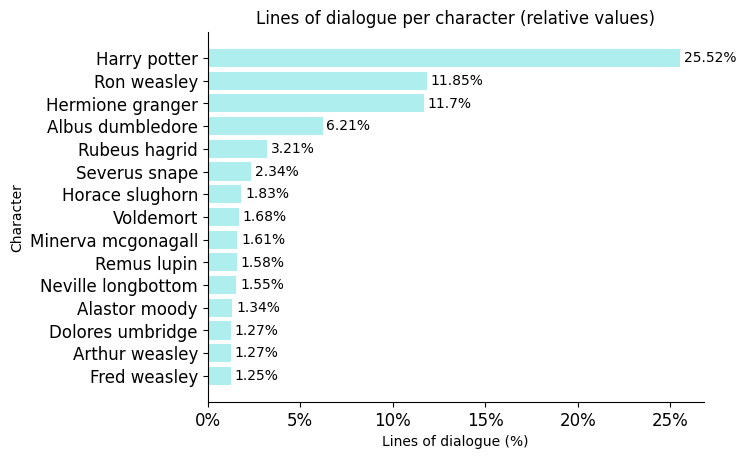

In [11]:
# Prepare the table
df_counts = df['Character'].value_counts().reset_index().rename(columns={'index': 'Character', 'Character': 'n'})
df_top15 = df_counts.head(15)
df_top15['Percentage'] = df_top15['n'] / len(df)

# The plot
fig, ax = plt.subplots()
bar_plot = ax.barh(df_top15['Character'], df_top15['Percentage'], color=['paleturquoise'])
ax.set_xlabel('Lines of dialogue (%)')
ax.set_ylabel('Character')
ax.set_title('Lines of dialogue per character (relative values)')

# Add labels
for i, v in enumerate(df_top15['Percentage']):
    ax.text(v + 0.002, i, str(round(v * 100, 2)) + "%", ha='left', va='center')

# Invert y-axis
ax.invert_yaxis()

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(fontsize=12,)
plt.xticks(fontsize=12,)
# Set y-axis ticks as percentages
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

plt.show()


## SENTIMENT INTENSITY ANALYZER, OVERALL SENTIMENT BY CHARACTER
It categorizes words into POSITIVE/NEGATIVE in order to have and overview of the character's "evilness".

In [12]:
#prepare the grouped dataset
df_g= df.groupby('Character')['Sentence'].apply(lambda x: ' '.join(x)).reset_index(name='Joined_Sentences')

In [13]:
#the characters i deem worthy
char_list = ['Harry potter', 'Ron weasley', 'Hermione granger','Albus dumbledore', 'Rubeus hagrid', 'Severus snape','Minerva mcgonagall', 'Horace slughorn', 'Voldemort','Neville longbottom', 'Remus lupin', 'Draco malfoy','Alastor moody','Fred weasley', 'Arthur weasley']

In [14]:
#get the filtered script
df_filtered = df_g[df_g['Character'].isin(char_list)].reset_index(drop=True)

In [15]:
df_filtered

,Character,Joined_Sentences
0,Alastor moody,That stupid roof. Alastor Moody. Ministry malc...
1,Albus dumbledore,I should have known that you would be here...P...
2,Arthur weasley,"Morning, Weasleys. What a night. Nine raids. N..."
3,Draco malfoy,"It's true then, what they're saying on the tra..."
4,Fred weasley,"We got Potter! We got Potter! Hey, well done, ..."
5,Harry potter,"Yes, Aunt Petunia. Yes, Uncle Vernon. He's asl..."
6,Hermione granger,He's right. I was being stupid. He's right. I ...
7,Horace slughorn,"There's no need to disfigure me, Albus! It's a..."
8,Minerva mcgonagall,"Good evening, Professor Dumbledore. Are the ru..."
9,Neville longbottom,"Trevor! Sorry. Seamus, that picture's moving!..."


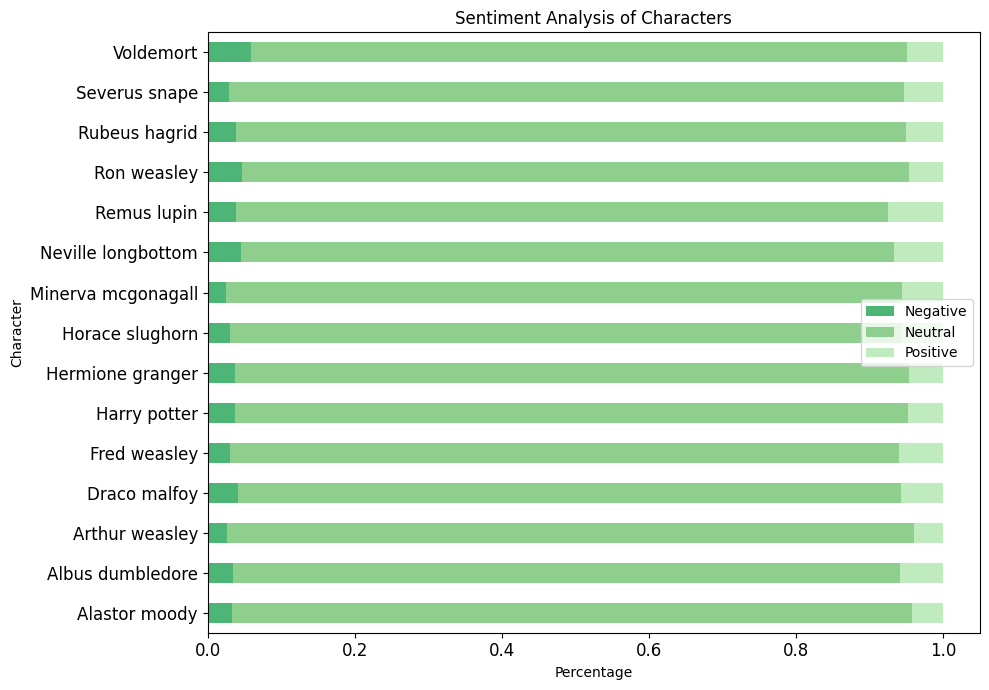

In [16]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to compute sentiment for each word
def get_sentiment(text):
    sentiment = [sia.polarity_scores(word)['compound'] for word in text.split()]
    return sentiment

# Apply sentiment analysis to each row
df_filtered['Sentiment'] = df_filtered['Joined_Sentences'].apply(get_sentiment)

# Function to get sentiment label
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Assign sentiment label for each score
df_filtered['Sentiment Label'] = df_filtered['Sentiment'].apply(lambda x: [get_sentiment_label(score) for score in x])

# Calculate percentage of positive, negative, and neutral words for each character
df_exploded = df_filtered.explode('Sentiment Label')
sentiment_percentage = df_exploded.groupby('Character')['Sentiment Label'].value_counts(normalize=True).unstack().fillna(0)

# Set color palette
colors = ['#4DB575', '#8FCF8D', '#C0EBBE']  # Define your own palette of greens

# Plot the percentages for each character
sns.set_palette(sns.color_palette(colors))
ax = sentiment_percentage.plot(kind='barh', stacked=True, figsize=(10, 7))

# Set the legend
handles, labels = ax.get_legend_handles_labels()
legend_labels = ['Negative', 'Neutral', 'Positive']
legend = plt.legend(handles, legend_labels, loc='center right')
plt.setp(legend.get_title(), fontsize='12')  # Optional: set legend title font size

plt.xlabel('Percentage')
plt.ylabel('Character')
plt.title('Sentiment Analysis of Characters')
plt.yticks(fontsize=12,)
plt.xticks(fontsize=12,)
plt.tight_layout()  # Optional: adjust the layout
plt.show()

##HUGGING FACE TEXT CLASSIFICATION
Classifies words in a range of 5 emotions

In [17]:
classifier_range = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', top_k=None)

In [20]:
def get_main_emotion(sentence):
    prediction = classifier_range(sentence)
    #get the dictionary with the highest score
    max_dict = max(prediction[0], key=lambda x:x['score'])
    #get the key of the dictionary with the highest score
    max_key = max_dict['label']
    return max_key
sid = SentimentIntensityAnalyzer()

def bin_emotion(sentence):
  sentiment_score = sid.polarity_scores(sentence)
  if sentiment_score['compound']>=0:
    sentiment = "positive"
  else:
    sentiment = "negative"
  return sentiment

def bin_score(sentence):
  return (sid.polarity_scores(sentence)['compound']+1)

df['binary_score']= df['Sentence'].apply(lambda x:bin_score(x))
df['binary_emotion']= df['Sentence'].apply(lambda x:bin_emotion(x))
df['Emotion']= df['Sentence'].apply(lambda z: get_main_emotion(z))

In [22]:
#get emotion counts by Part
grouped_df = df.groupby(['Character', 'Part'])['Emotion'].value_counts().reset_index(name='Emotion_count').sort_values(['Part', 'Emotion_count'], ascending=[True,False]).reset_index(drop=True)
#get normalized emotion count
g_df = df.groupby(['Character', 'Part'])['Emotion'].value_counts(normalize=True).reset_index(name='Emotion_normalized').sort_values(['Part', 'Character','Emotion'], ascending=[True, True,True]).reset_index(drop=True)
grouped_df = pd.merge(grouped_df, g_df, on=['Character', 'Part', 'Emotion'])

In [23]:
grouped_df.groupby(['Character','Part']).head(30)

,Character,Part,Emotion,Emotion_count,Emotion_normalized
0,Harry potter,Harry Potter and the Philosopher's Stone,anger,136,0.555102
1,Ron weasley,Harry Potter and the Philosopher's Stone,anger,67,0.471831
2,Harry potter,Harry Potter and the Philosopher's Stone,joy,65,0.265306
3,Ron weasley,Harry Potter and the Philosopher's Stone,joy,55,0.387324
4,Rubeus hagrid,Harry Potter and the Philosopher's Stone,joy,50,0.510204
...,...,...,...,...,...
974,Sirius black,Harry Potter and the Deathly Hallows Part 2,anger,1,0.500000
975,Sirius black,Harry Potter and the Deathly Hallows Part 2,joy,1,0.500000
976,Sorting hat,Harry Potter and the Deathly Hallows Part 2,joy,1,1.000000
977,Student,Harry Potter and the Deathly Hallows Part 2,anger,1,1.000000


### Character Emotion Progression by Movie Parts

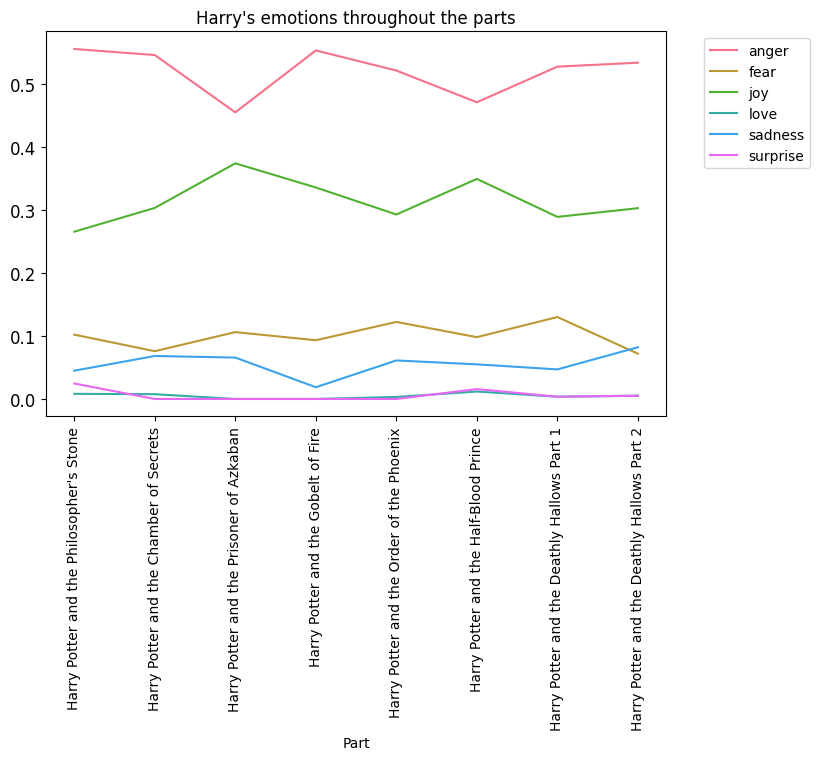

In [24]:
harry_df = grouped_df[grouped_df['Character'] == 'Harry potter']
harry_df = harry_df[['Part', 'Emotion', 'Emotion_normalized']]
#i will pivot the table in order to have the emotions as columns
harry_df = harry_df.pivot(index='Part', columns='Emotion', values='Emotion_normalized')
harry_df = harry_df.fillna(0)
#i will plot the pivot table
sns.set_palette("husl")
harry_df.plot(kind='line', figsize=(8,5), title='Harry\'s emotions throughout the parts').legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.yticks(fontsize=12,)
plt.xticks(fontsize=10,)
plt.show()

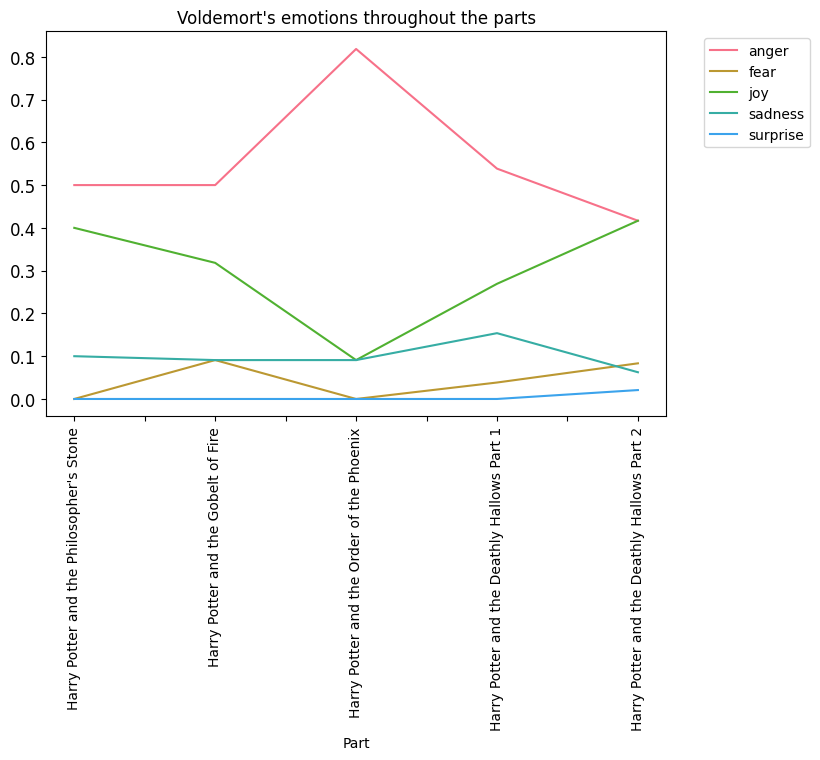

In [100]:
voldi_df = grouped_df[grouped_df['Character'] == 'Voldemort']
voldi_df = voldi_df[['Part', 'Emotion', 'Emotion_normalized']]
#i will pivot the table in order to have the emotions as columns
voldi_df = voldi_df.pivot(index='Part', columns='Emotion', values='Emotion_normalized')
voldi_df = voldi_df.fillna(0)
#i will plot the pivot table
sns.set_palette("husl")
voldi_df.plot(kind='line', figsize=(8,5), title='Voldemort\'s emotions throughout the parts').legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.yticks(fontsize=12,)
plt.xticks(fontsize=10,)
plt.show()#no love for voldi

### Character's Emotion Progression by chapter and movie part

In [104]:
def chapter_emotions(part,character):

  movie_data = df[(df['Part'] == part) & (df['Character']==character)]
  df_2= movie_data.groupby('movie_chapter')['binary_score'].mean().reset_index(name = 'mean').sort_values(['movie_chapter'], ascending=[True])
  return df_2


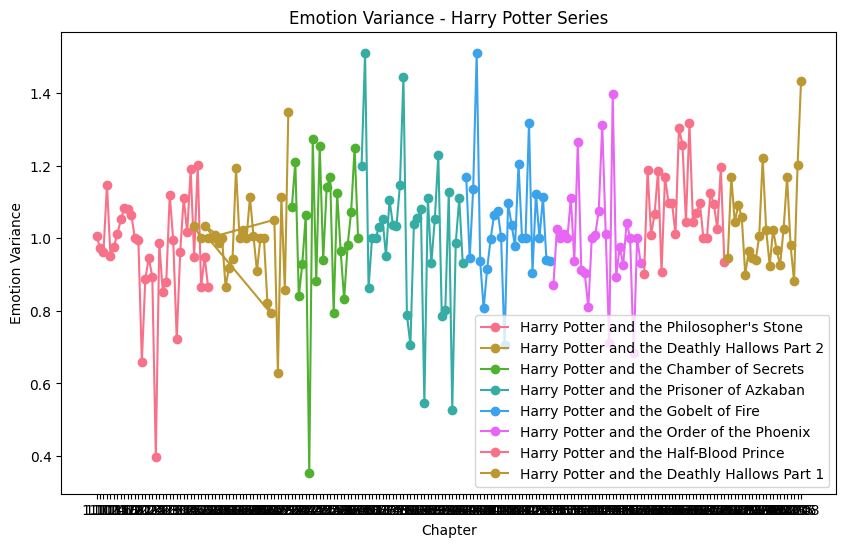

In [108]:
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each movie part
for part in df['Part'].unique():
    movie_data = chapter_emotions(part,'Harry potter')
    ax.plot(movie_data['movie_chapter'], movie_data['mean'], marker='o', label=part)

# Customize the plot
ax.set_title('Emotion Variance - Harry Potter Series')
ax.set_xlabel('Chapter')
ax.set_ylabel('Emotion Variance')
ax.legend()

# Show the plot
plt.show()

## BUILD MODEL FOR SENTIMENT ANALYSIS

In [ ]:
#get values from Sentences
dialogue = df.Sentence.values

#tokenize sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dialogue)

#encode tokens to sequences
encoded_docs = tokenizer.texts_to_sequences(dialogue)

#pad sequences since sentences have different lengths
padded_sequence = pad_sequences(encoded_docs)

# Convert the binary_emotion column to numerical labels
labels = np.where(df['binary_emotion'] == 'positive', 1, 0)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequence, labels, test_size=0.2, random_state=42)

In [ ]:
# Define the neural network architecture
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1,10, input_length=X_train.shape[1]))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 192, 10)           61230     
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 64)                122944    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 184,239
Trainable params: 184,239
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the neural network
model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
24/24 [==============================] - 2s 22ms/step - loss: 0.5471 - accuracy: 0.7634 - val_loss: 0.5004 - val_accuracy: 0.7931
Epoch 2/10
24/24 [==============================] - 0s 13ms/step - loss: 0.5061 - accuracy: 0.7881 - val_loss: 0.4920 - val_accuracy: 0.7931
Epoch 3/10
24/24 [==============================] - 0s 11ms/step - loss: 0.4906 - accuracy: 0.7883 - val_loss: 0.4796 - val_accuracy: 0.7931
Epoch 4/10
24/24 [==============================] - 0s 12ms/step - loss: 0.4679 - accuracy: 0.7903 - val_loss: 0.4630 - val_accuracy: 0.7952
Epoch 5/10
24/24 [==============================] - 0s 14ms/step - loss: 0.4309 - accuracy: 0.8049 - val_loss: 0.4435 - val_accuracy: 0.8012
Epoch 6/10
24/24 [==============================] - 0s 14ms/step - loss: 0.3744 - accuracy: 0.8361 - val_loss: 0.4178 - val_accuracy: 0.8086
Epoch 7/10
24/24 [==============================] - 0s 13ms/step - loss: 0.3008 - accuracy: 0.8776 - val_loss: 0.3997 - val_accuracy: 0.8146
Epoch 8/10
24

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,192)
    prediction = int(model.predict(tw).round().item())
    match prediction:
      case 0:
        prediction ='negative'
      case 1:
        prediction = 'positive'
    print("Predicted label: ", prediction)
    prediction = classifier_range(text)
    df_emotions =pd.DataFrame(prediction[0])
    df_emotions.plot(kind='bar', x='label', y='score', figsize=(5, 3), title=f'{text}', color=['green', 'lightgreen', 'yellowgreen', 'limegreen', 'darkgreen', 'forestgreen'])


1/1 [==============================] - 0s 91ms/step
Predicted label:  negative


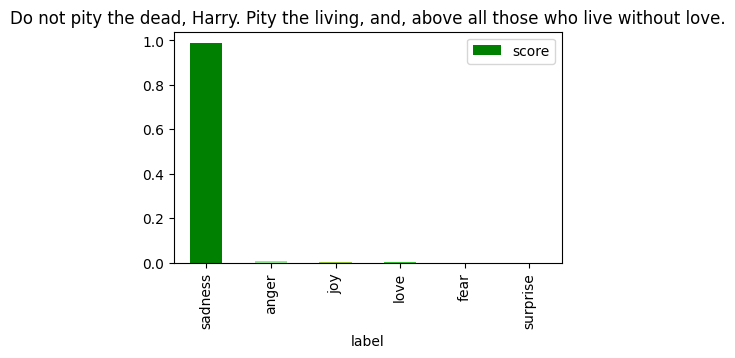

In [ ]:
frase = "Do not pity the dead, Harry. Pity the living, and, above all those who live without love."
predict_sentiment(frase)

1/1 [==============================] - 0s 28ms/step
Predicted label:  positive


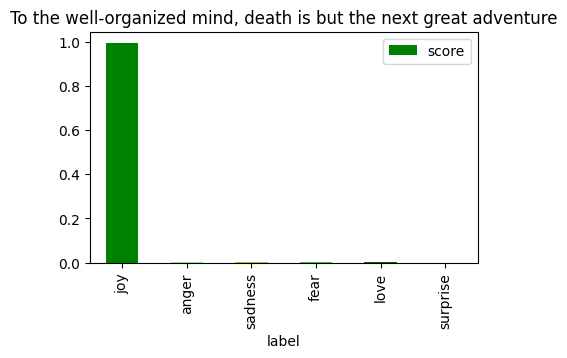

In [ ]:
frase2 = "To the well-organized mind, death is but the next great adventure"
predict_sentiment(frase2)

1/1 [==============================] - 0s 26ms/step
Predicted label:  positive


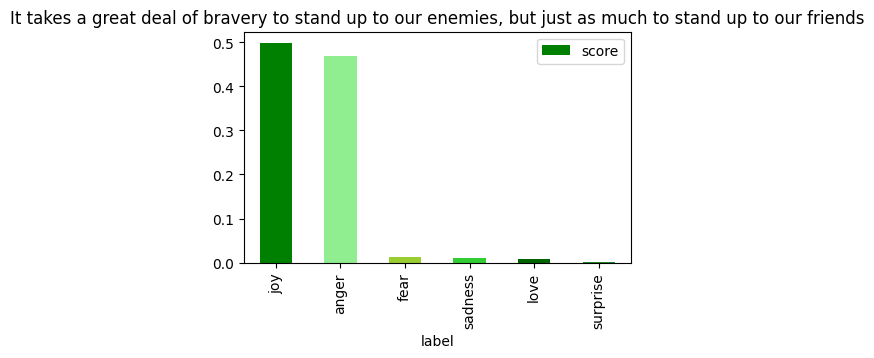

In [ ]:
frase3 = "It takes a great deal of bravery to stand up to our enemies, but just as much to stand up to our friends"
predict_sentiment(frase3)

## SOCIAL NETWORK

In [ ]:
df

,Part,Chapter,Character,Sentence,Emotion,binary_emotion
1,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus dumbledore,I should have known that you would be here...P...,anger,positive
2,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva mcgonagall,"Good evening, Professor Dumbledore. Are the ru...",joy,positive
3,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus dumbledore,"I'm afraid so, Professor. The good, and the bad.",fear,negative
4,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Minerva mcgonagall,And the boy?,anger,positive
5,Harry Potter and the Philosopher's Stone,Doorstep Delivery,Albus dumbledore,Hagrid is bringing him.,anger,positive
...,...,...,...,...,...,...
708,Harry Potter and the Deathly Hallows Part 2,Nineteen Years Later,Harry potter,Then Slytherin House will have gained a wonder...,joy,positive
709,Harry Potter and the Deathly Hallows Part 2,Nineteen Years Later,Albus potter,Really?,anger,positive
710,Harry Potter and the Deathly Hallows Part 2,Nineteen Years Later,Harry potter,Really.,anger,positive
711,Harry Potter and the Deathly Hallows Part 2,Nineteen Years Later,Harry potter,Ready?,joy,positive


In [ ]:
char_list = ['Albus dumbledore', 'Minerva mcgonagall', 'Rubeus hagrid','Petunia dursley', 'Dudley dursley', 'Vernon dursley','Harry potter','Quirinus quirrell', 'Goblin', 'Griphook',
'Garrick ollivander','Molly weasley', 'George weasley','Fred weasley', 'Ginny weasley', 'Ron weasley', 'Hermione granger', 'Neville longbottom', 'Draco malfoy',
'Sorting hat', 'Seamus finnigan', 'Percy weasley','Nearly headless nick', 'Bloody baron','Severus snape','Rolanda hooch','Argus filch','Oliver wood', 'Filius flitwick', 'Lee jordan',
'Gryffindors', 'Marcus flint','Firenze','Voldemort', 'Dobby', 'Arthur weasley', 'Photographer','Gilderoy lockhart', 'Lucius malfoy', 'Station guard',
'Whomping willow', 'Pomona sprout', 'Collin creevey','Dean thomas', 'Howler', 'Pixie', 'Basilisk', 'Poppy pomfrey','Moaning myrtle', 'Vincent crabbe', 'Justin finch-fletchley',
'Gregory goyle', 'Diary', 'Tom riddle', 'Cornelius fudge','Aragog', 'Marge dursley', 'Stanley shunpike', 'Shrunken head','Remus lupin', 'Sybill trelawney', 'Pansy parkinson',
'Parvati patil', 'Rosmerta', 'Ghost', 'Sirius black',
'Peter pettigrew', 'Bartemius crouch junior','Amos diggory', 'Cedric diggory','Bartemius crouch','Trolley witch', 'Cho chang','Igor karkaroff',
'Olympe maxime', 'Alastor moody', 'Rita skeeter', 'Viktor krum','Nigel wolpert', 'Padma patil', 'Merpeople','Fleur delacour', 'James potter', 'Lily potter', 'Gang thug',
'Arabella figg', 'Nymphadora tonks', 'Kingsley shacklebolt','Walburga black', 'Perkins', 'Susan bones', 'Dolores umbridge','Kreacher', 'Luna lovegood', 'Angelina johnson', 'Zacharias smith',
'Michael corner', 'Lavander brown', 'Ernest macmillan', 'Everard','Dilys derwent', 'Phineas', 'Grawp', 'Bane', 'Griselda marchbanks',
'Magorian', 'Centaur', 'Bellatrix lestrange', 'Death eater','Narcissa malfoy','Horace horace slughorn','Horace slughorn', 'Lavender brown', 'Blaise zabini', 'Katie bell',
'Mrs. cole', 'Cormac mclaggen', 'Skinny kid', 'Leanne','Marcus belby', 'Eldred worple', 'Waiter', 'Fenrir greyback',
'Rufus scrimgeour', 'Mrs. granger', 'Mr. granger', 'Corban yaxley','Pius thicknesse', 'Charity burbage', 'Bill weasley','Mundungus fletcher', 'Voldemont', 'Xenophilius lovegood',
'Elphias doge', 'Muriel','Wakanda','Mary cattermole', 'Mykew gregorovitch', 'Scabior','Bathilda bagshot', 'Gellert grindelwald', 'Snatcher', 'Bogrod',
 'Aberforth dumbledore', 'Alecto carrow','Helena ravenclaw', 'Albus potter']

In [ ]:
def find_protagonist_name(char_list,sentence):
    for protagonist in char_list:
        pattern = r'\b{}\b'.format(re.escape(protagonist))
        if re.search(pattern, sentence, re.IGNORECASE):
            return protagonist

    return 'NOT HERE'

In [ ]:
df['referred'] = df['Sentence'].apply(lambda x:find_protagonist_name(char_list,x))

In [ ]:
df = df[df['referred']!= 'NOT HERE']

In [ ]:
import networkx as nx

# Create an empty network graph
G = nx.MultiDiGraph()

# Iterate over each dialogue in the DataFrame
for _, row in df.iterrows():
    character1 = row['Character']
    character2 = row['referred']
    emotion = row['Emotion']

    # Add an edge between the characters involved in the dialogue
    G.add_edge(character1, character2, emotion=emotion)

In [ ]:
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))

Nodes: ['Albus dumbledore', 'Harry potter', 'Rubeus hagrid', 'Lily potter', 'Tom', 'Goblin', 'Voldemort', 'Ron weasley', 'Hermione granger', 'Draco malfoy', 'Minerva mcgonagall', 'Susan bones', 'Girl', 'Bloody baron', 'Nearly headless nick', 'Percy weasley', 'Gryffindors', 'Severus snape', 'Oliver wood', 'Neville longbottom', 'Parvati patil', 'Lee jordan', 'Angelina johnson', 'Marcus flint', 'Firenze', 'Vernon dursley', 'Dobby', 'Other', 'Gilderoy lockhart', 'Photographer', 'Lucius malfoy', 'Whomping willow', 'Seamus finnigan', 'Howler', 'Moaning myrtle', 'Diary', 'Tom riddle', 'Aragog', 'Cornelius fudge', 'Basilisk', 'Ginny weasley', 'Ghost', 'Sorting hat', 'Arthur weasley', 'Stanley shunpike', 'Sirius black', 'Remus lupin', 'The fat lady', 'Rosmerta', 'Peter pettigrew', 'Amos diggory', 'Igor karkaroff', 'Viktor krum', 'Alastor moody', 'Fleur delacour', 'Cedric diggory', 'Rita skeeter', 'Student', 'Padma patil', 'Merpeople', 'Bartemius crouch', 'Bartemius crouch junior', 'Nymphadora t

In [ ]:
nx.write_gexf(G, '/content/sample_network.gexf')